# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Coral Yagud 208635490
2.   Lior Biton 209502079

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [2]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')

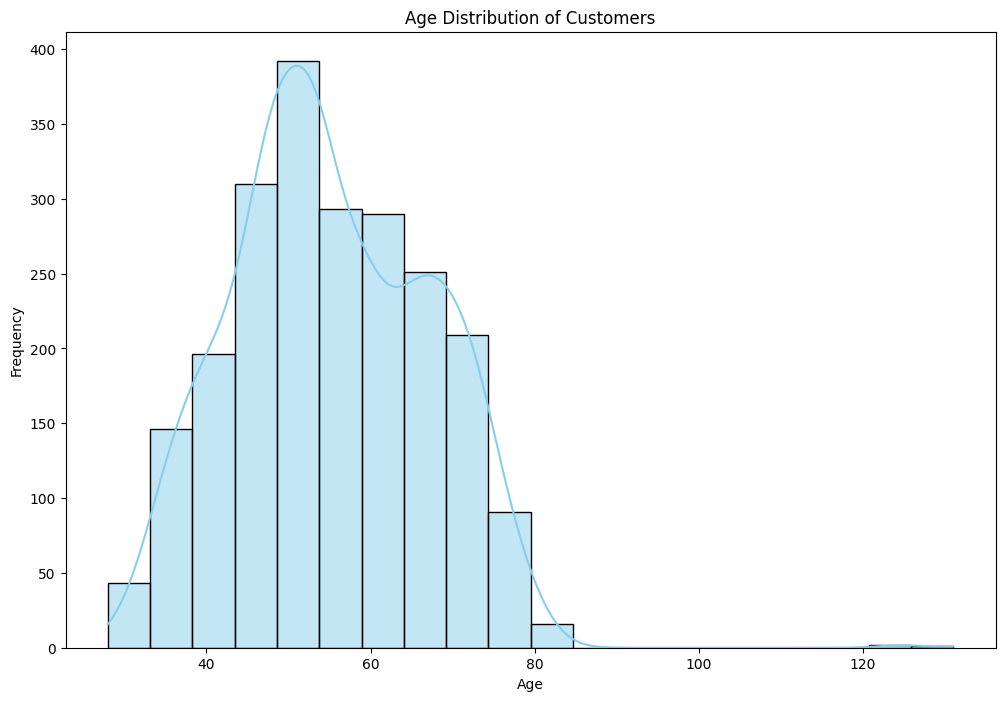

In [3]:
# Graph 1 -
# Age Distribution of costumers
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Plot Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Insight** - The dataset covers a wide range of ages, from 28 to 131. The company's main customer base is between 50 and 70 years old. Targeted marketing for this group could be beneficial.

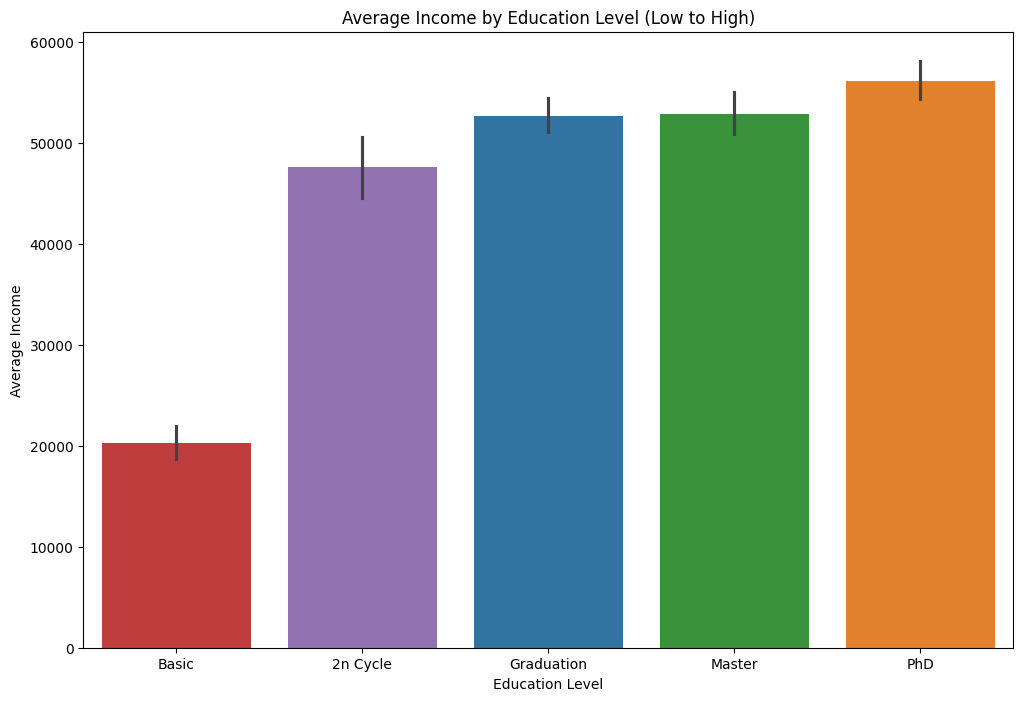

In [4]:
# Graph 2 -
# Calculate average income for each education level
avg_income_by_education = df.groupby('Education')['Income'].mean().sort_values()

# Reorder the Education levels based on average income
education_order = avg_income_by_education.index

# Plotting the bar chart with a colorful palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Income', data=df, order=education_order, hue='Education')
plt.title('Average Income by Education Level (Low to High)')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.show()


**Insight** - The data suggests a positive correlation between education level and average income. Higher education levels, such as a Ph.D., tend to be associated with higher average incomes, supporting the common belief that advanced education often leads to increased earning potential.

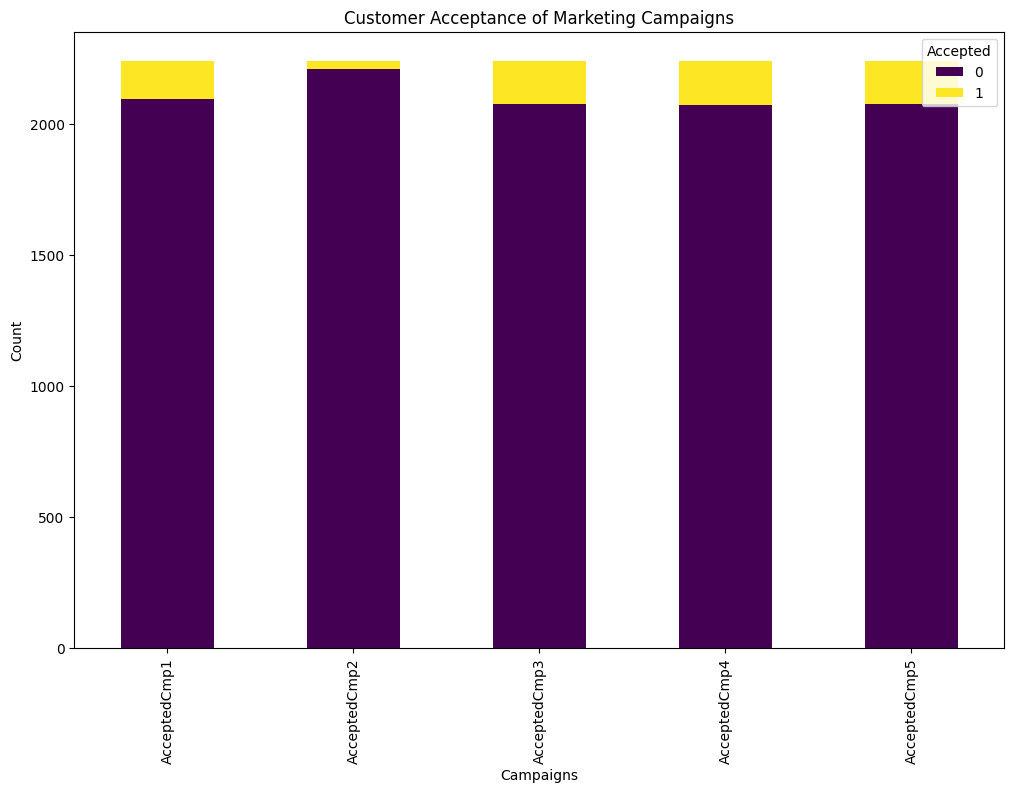

In [5]:
# Graph 3 -
# Extracting relevant columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Plotting the stacked bar chart
df_campaigns = df[campaign_cols].apply(pd.Series.value_counts).transpose()
df_campaigns.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Customer Acceptance of Marketing Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

**Insight** - While Campaigns 1, 3, 4, and 5 showcased similar levels of success, Campaign 2, on the other hand, exhibited a comparatively lower success rate. This suggests that Campaign 2 may have been less effective in terms of customer acceptance when compared to its counterparts.

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [6]:
# load the data
data = pd.read_csv('/content/customer_segmentation.csv')
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [7]:
# Scale the data using MinMaxScaler
df = data.copy()

# Calculate the number of days from each date to today and create a new column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Days_Since_Enrollment'] = (datetime.now() - df['Dt_Customer']).dt.days
df = df.drop(['ID', 'Dt_Customer'], axis=1)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encode categorical variables
categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   Year_Birth    Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0    0.621359  0.084832      0.0       0.0  0.585859  0.425318   0.442211   
1    0.592233  0.067095      0.5       0.5  0.383838  0.007368   0.005025   
2    0.699029  0.105097      0.0       0.0  0.262626  0.285332   0.246231   
3    0.883495  0.037471      0.5       0.0  0.262626  0.007368   0.020101   
4    0.854369  0.085065      0.5       0.0  0.949495  0.115874   0.216080   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         0.316522         0.664093          0.334601  ...   
1         0.003478         0.007722          0.003802  ...   
2         0.073623         0.428571          0.079848  ...   
3         0.011594         0.038610          0.011407  ...   
4         0.068406         0.177606          0.102662  ...   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0   

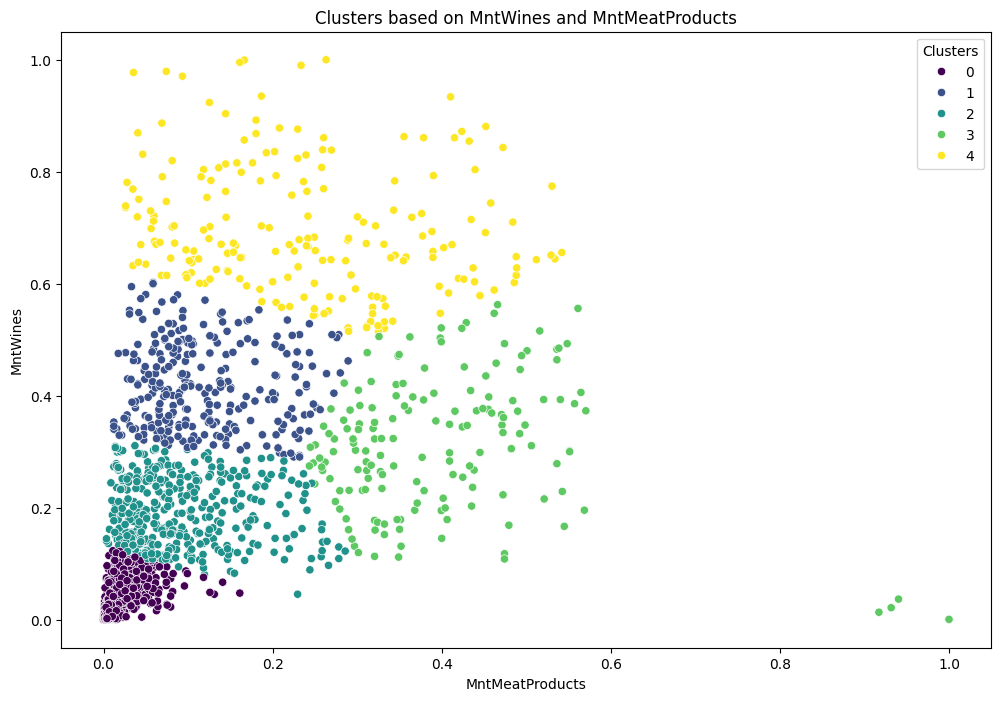

In [8]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
x = df.copy()
features = x[['MntMeatProducts', 'MntWines']]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
x['Clusters'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MntMeatProducts', y='MntWines', hue='Clusters', data=x, palette='viridis')
plt.title('Clusters based on MntWines and MntMeatProducts')
plt.show()

In [9]:
y = df.copy()

# Drop rows with missing values
df_cleaned = y.dropna()

# Range of k values
k_values = range(2, 11)

# Elbow Method and Silhouette Method
inertia = []
silhouette_scores = []

for k in k_values:
    # Elbow Method
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

    # Silhouette Method
    labels = kmeans.predict(df_cleaned)
    silhouette_scores.append(silhouette_score(df_cleaned, labels))

### Elbow

Text(0, 0.5, 'Inertia')

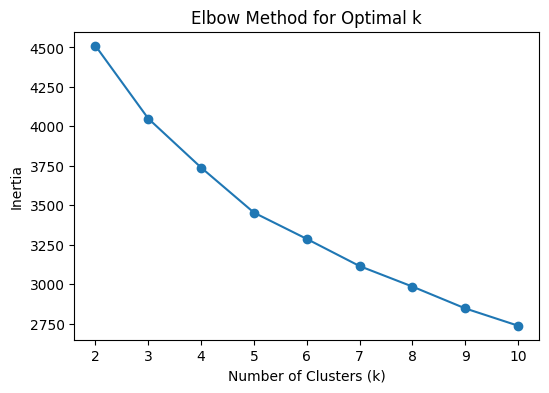

In [10]:
# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

### Silhouette Score

Text(0, 0.5, 'Silhouette Score')

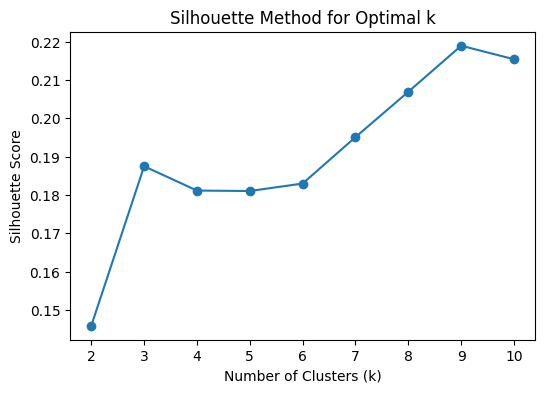

In [11]:
# Plot Silhouette Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

According to Silhouette method - the best k is k=9.

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





        PC1       PC2
0 -0.676843  0.393323
1 -0.588825  0.279696
2 -0.642054  0.551983
3 -0.597873  0.523388
4  0.808820 -0.630151


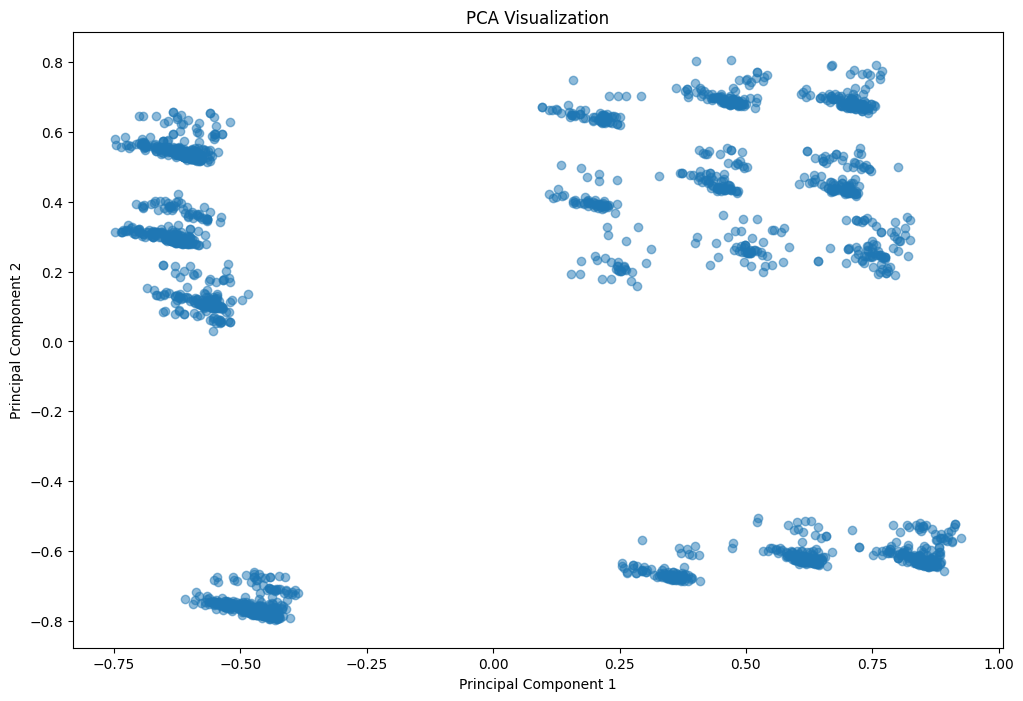

Explained Variance (PC1): 0.146
Explained Variance (PC2): 0.138


In [12]:
t = df.copy()
# Drop rows with missing values
t = t.dropna()

# Adjust n_components as needed
n_components = 2

# Create a DataFrame with the principal components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(t)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
print(pca_df.head())

# Plotting the PCA
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='o', alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance (PC1): {explained_variance_ratio[0]:.3f}")
print(f"Explained Variance (PC2): {explained_variance_ratio[1]:.3f}")


**Q**: What is the variance explained in the 2 component PCA?

**A**:0.146 + 0.138 = 0.284

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [13]:
# Run PCA with n_components = 2 - in the code above
# Range of k values
k_values = range(1, 11)

# Elbow Method and Silhouette Analysis
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Elbow Method
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

    # Silhouette Analysis (skip k=1)
    if k > 1:
        cluster_labels = kmeans.predict(pca_df)
        silhouette_scores.append(silhouette_score(pca_df, cluster_labels))

### Elbow

Text(0, 0.5, 'Inertia')

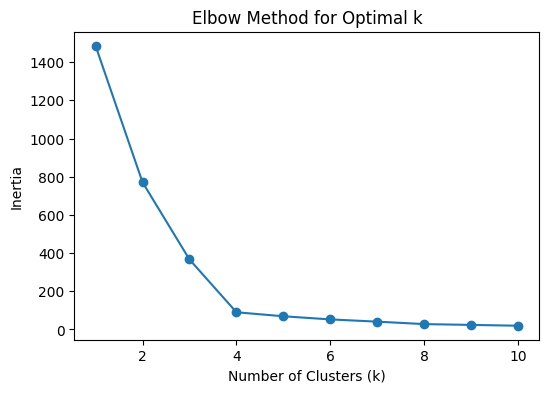

In [14]:
# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

### Silhouette

Text(0, 0.5, 'Silhouette Score')

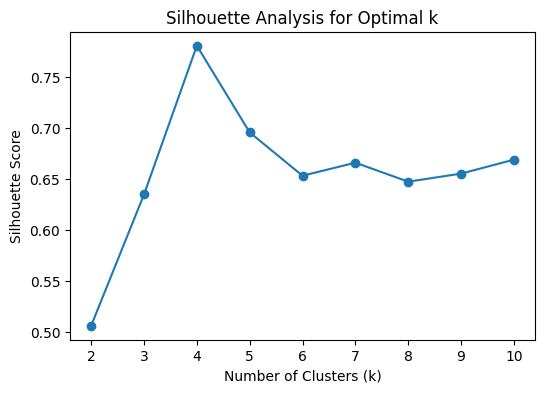

In [15]:
# Plot Silhouette Method
k_values = range(2, 11)
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

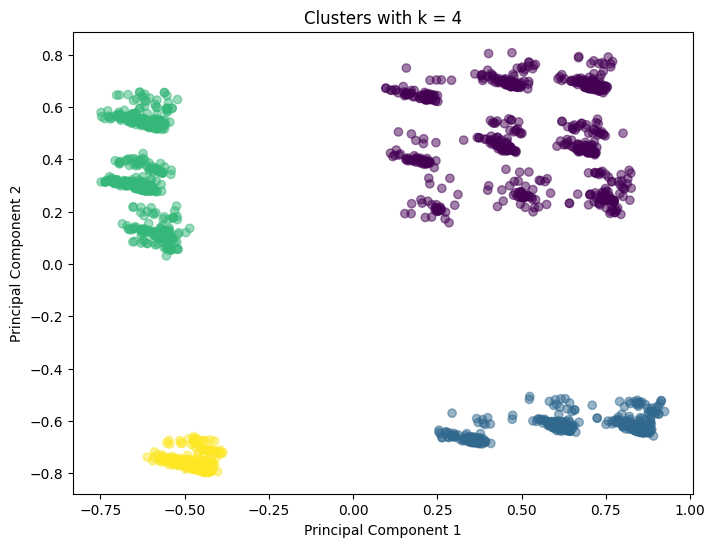

In [16]:
# Fit k-means with k = 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
pca_df['Clusters'] = kmeans.fit_predict(pca_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Clusters'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Clusters with k = 4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:The elbow method and the Silhouette method indicate that we should use 4 clusters, and this aligns with the visual interpretation of the graph above.

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











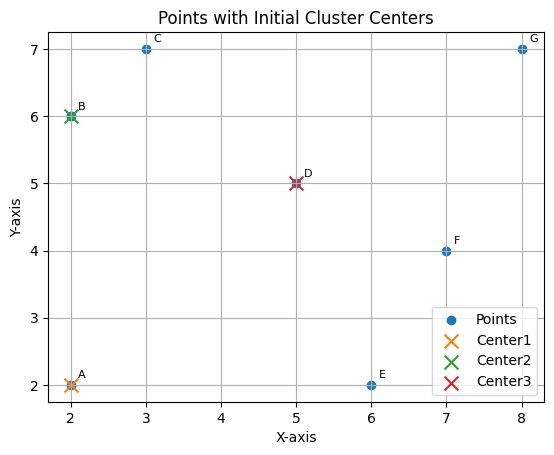

In [17]:
# Given two-dimensional points
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}

# Plotting the points
plt.scatter(*zip(*points.values()), label='Points')
for point, coordinates in points.items():
    plt.text(coordinates[0] + 0.1, coordinates[1] + 0.1, point, fontsize=8, color='black')  # Adjusted offset

# Initial cluster centers
centers = {'Center1': points['A'], 'Center2': points['B'], 'Center3': points['D']}
for center, coordinates in centers.items():
    plt.scatter(*coordinates, label=center, marker='x', s=100)

plt.title('Points with Initial Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

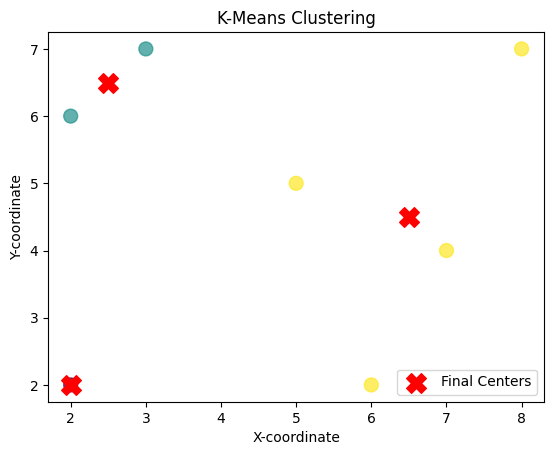

Final Assignments: {'A': 'Center1', 'B': 'Center2', 'C': 'Center2', 'D': 'Center3', 'E': 'Center3', 'F': 'Center3', 'G': 'Center3'}
Final Centers: {'Center1': (2.0, 2.0), 'Center2': (2.5, 6.5), 'Center3': (6.5, 4.5)}


In [18]:
# delete
# Given data
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}
data = np.array(list(points.values()))

# Initial cluster centers
initial_centers = np.array(list(points.values()))[[0, 1, 3]]  # Choosing A, D, and G as initial centers

# Fit k-means model
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=42)
kmeans.fit(data)

# Get final cluster centers and labels
final_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Assign points to the nearest final center
assignments = {point_name: f'Center{label + 1}' for (point_name, _), label in zip(points.items(), labels)}

# Plotting the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='red', marker='X', s=200, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()
print("Final Assignments:", assignments)
print("Final Centers:", {f'Center{i + 1}': tuple(center) for i, center in enumerate(final_centers)})

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:

1. Final Assignments: {'A': 'Center1', 'B': 'Center2', 'C': 'Center2', 'D': 'Center3', 'E': 'Center3', 'F': 'Center3', 'G': 'Center3'}
Final Centers: {'Center1': (2.0, 2.0), 'Center2': (2.5, 6.5), 'Center3': (6.5, 4.5)}

2. Yes, the k-means algorithm works by iteratively assigning data points to the nearest cluster center and then updating the cluster centers based on the mean of the assigned points. The algorithm may converge to a local minimum of the objective function, and the outcome can depend on the starting points. In addition, the k-means solution space can have multiple equivalent solutions that achieve the same objective function value.
3. K-means clustering can group customers with similar purchasing patterns, helping the company tailor marketing strategies for different customer segments. In addition, Cluster patients with similar health characteristics, allowing healthcare professionals to tailor treatments based on cluster-specific needs. finally, K-means clustering can improve product recommendations for users based on their purchase history, helping in recommending products to users within the same cluster.


## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

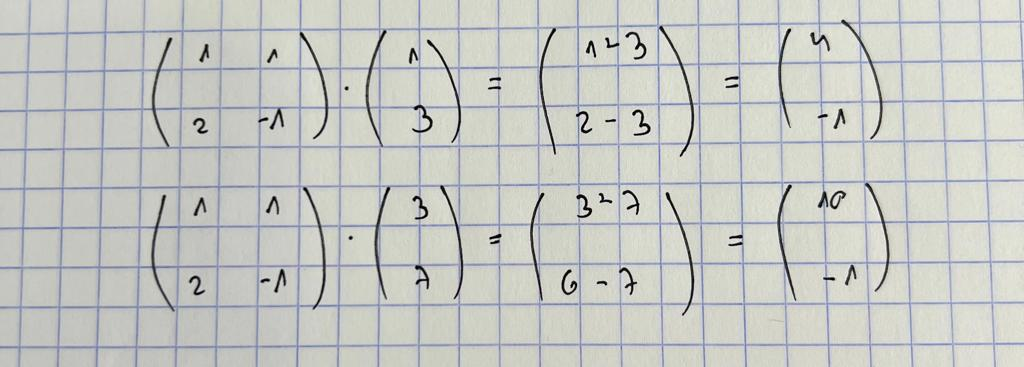